## Predicting house sale price for Boulder County, Colorado - Modeling

### Introduction: <br>
I would like to help all market participants make better and more informed decisions when participating in Boulder County residential real estate market. 
Some important questions are: 
<dd>1. What property features are important in contributing to sales price
<dd>2. What neighbourhoods are popular and add additional value and which don’t
<dd>3. See the distribution of the properties for each area <br>
    
It can help all market participants, either people looking to enter the market and make a choice that fits their needs and budget or for people in the market to optimize their real estate asset management. 


### Feature description

The feature engineering step has already been performed in Exploratory Data Analysis section. 
Here are our numeric features: 
1. 'Eff Yr Built' - year house was built in
2. 'Above Grd SF' - Above ground area in square feet
3. 'Basemt Unf SF' - Total unfinished basement area in square feet
4. 'Basemt Fin SF' - Finished basement area in square feet
5. 'Garage SF' - Garage area in square feet
6. 'Est Land SF' - Land area in square feet
7. 'Unincorporated' - Binary variable 1 if the house is located in unincorporated land https://bouldercounty.gov/government/about-boulder-county/unincorporated-towns/
8. 'Quality_cat' - Categorical variable from 1 to 14 representing house quality
9. 'Garage Attached' - Binary variable 1 if garage is attached, 0 for all other options
10. 'Time Adjust Sales Price' - our target response variable <br>
The following are one hot encoded Design/Market Area variables.   <br>  
       'Design_1 Sty Townh'  
       'Design_Bi Level'
       'Design_Modular'
       'Design_Multi Sty'       
       'Design_Multi Sty Townh'    
       'Design_Condo'
       'Design_Paired'
       'Design_Patio'
       'Design_Ranch'
       'Design_Split level'
       
       'Market Area_101'
       'Market Area_102'
       'Market Area_103'
       'Market Area_104',
       'Market Area_105'
       'Market Area_106'
       'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634'
       
       'Property Type_DUP_TRI',
       'Property Type_RCON', 'Property Type_SFR', 'Property Type_TWNHM'



### 1. Import necessary libraries and data

In [5]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn import tree, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from io import StringIO  
from IPython.display import Image  
import pydotplus


In [6]:
X = pd.read_csv('data/data_for_modeling.csv')

In [7]:
X.columns

Index(['Eff Yr Built', 'Above Grd SF', 'Basemt Fin SF', 'Basemt Unf SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Townh', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634',
       'Time Adjust Sales Price', 'Property Type_DUP_TRI',
       'Property Type_RCON', '

In [15]:
features = X.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Fin SF', 'Basemt Unf SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Townh', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634',
       'Property Type_DUP_TRI',
       'Property Type_RCON', 'Property Type_SFR', 'Property Type_TWNHM']]
Y = X['Time Adjust Sales Price']


### Model 1.  Linear regression model

It is important to build linear regression model to use both as benchmark and most interpretable and computationally light model. <br>
Question 1: Do we need to standardize the variables? <br>
Answer: No. In general, you do not need to center or standardize your data for multiple regression. Different explanatory variables are almost always on different scales (i.e., measured in different units). This is not a problem; the betas are estimated such that they convert the units of each explanatory variable into the units of the response variable appropriately. 

In [16]:
X_train_const = sm.add_constant(features)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75, random_state=123)

In [18]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.780
Model:                                 OLS   Adj. R-squared:                  0.779
Method:                      Least Squares   F-statistic:                     1694.
Date:                     Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                             13:24:44   Log-Likelihood:            -2.7525e+05
No. Observations:                    20124   AIC:                         5.506e+05
Df Residuals:                        20081   BIC:                         5.509e+05
Df Model:                               42                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.944e+06   1.92e+05    -15.347      0.000   -3.32e+06   -2.57e+06
Eff Yr Built            2180.5186    136.030     16.030      0.000    1913.889    2447.148
Above Grd SF             174.6258      3.761     46.433      0.000     167.254     181.997
Basemt Fin SF             71.3192      3.844     18.553      0.000      63.784      78.854
Basemt Unf SF            -29.3706      4.036     -7.277      0.000     -37.282     -21.459
Garage SF                 47.9983      3.342     14.362      0.000      41.448      54.549
Est Land SF                5.6910      0.234     24.285      0.000       5.232       6.150
Unincorporated          5.844e+04   9658.712      6.051      0.000    3.95e+04    7.74e+04
Quality_cat             5.663e+04   1122.098     50.468      0.000    5.44e+04    5.88e+04
Garage Attached        -5.998e+04   4413.477    -13.590      0.000   -6.86e+04   -5.13e+04
Design_1 Sty Townh     -3.297e+05   2.72e+04    -12.117      0.000   -3.83e+05   -2.76e+05
Design_Bi Level        -1.481e+05   2.09e+04     -7.071      0.000   -1.89e+05   -1.07e+05
Design_Condo           -5.951e+05   3.53e+04    -16.842      0.000   -6.64e+05   -5.26e+05
Design_Modular         -3.646e+05   7.76e+04     -4.696      0.000   -5.17e+05   -2.12e+05
Design_Multi Sty       -2.465e+05   1.95e+04    -12.657      0.000   -2.85e+05   -2.08e+05
Design_Multi Sty Townh -3.729e+05   2.66e+04    -13.996      0.000   -4.25e+05   -3.21e+05
Design_Paired          -2.525e+05   2.36e+04    -10.717      0.000   -2.99e+05   -2.06e+05
Design_Patio           -2.691e+05   2.46e+04    -10.921      0.000   -3.17e+05   -2.21e+05
Design_Ranch           -1.958e+05   1.92e+04    -10.201      0.000   -2.33e+05   -1.58e+05
Design_Split level     -1.701e+05   1.98e+04     -8.575      0.000   -2.09e+05   -1.31e+05
Market Area_101         7.227e+05   1.38e+04     52.285      0.000    6.96e+05     7.5e+05
Market Area_102         1.831e+05   1.38e+04     13.292      0.000    1.56e+05     2.1e+05
Market Area_103         4.895e+05   1.38e+04     35.439      0.000    4.62e+05    5.17e+05
Market Area_104         3077.4432   1.68e+04      0.183      0.855   -2.99e+04    3.61e+04
Market Area_105        -5.291e+04   1.39e+04     -3.817      0.000   -8.01e+04   -2.57e+04
Market Area_106         2.622e+05   1.39e+04     18.811      0.000    2.35e+05     2.9e+05
Market Area_107          4.03e+05   1.49e+04     27.021      0.000    3.74e+05    4.32e+05
Market Area_108        -1.751e+05   2.86e+04     -6.133      0.000   -2.31e+05   -1.19e+05
Market Area_109         2.175e+04   3.09e+04      0.703      0.482   -3.89e+04    8.24e+04
Market Area_401        -2.878e+05   1.52e+04    -18.885      0.000   -3.18e+05   -2.58e+05
Market Area_402        -3

T-stats look good for most coefficients except Market Area_104, Market Area_109.
The Durbin-Watson is 1.978 and between 1.5 and 2.5, so autocorrelation is likely not a cause for concern.


In [21]:
linear_pred = results.predict(X_test)
R2 = 1 - (np.sum((y_test-linear_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, linear_pred, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

Test set R2:  0.7605254356093424
RMSE of the base model: 224047.203


In [22]:
residuals = np.asarray(y_test - results.predict(X_test))

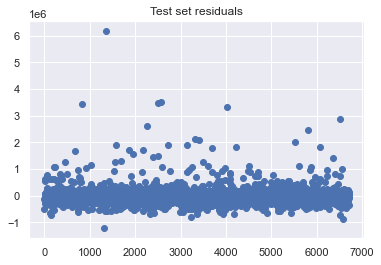

6188984.4493750725


In [23]:
sns.set()
plt.plot(residuals, 'bo')
plt.title('Test set residuals')
plt.show()
print(max(residuals))


Now let's look at the residual's qqplot. 

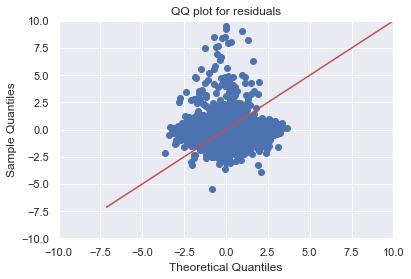

In [24]:
residuals.shape
reshaped =np.reshape(residuals, (-1, 1))
scaler = StandardScaler()
scaler.fit(reshaped)
stand_resid =scaler.transform(reshaped)
fig = sm.qqplot(stand_resid, line='45')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("QQ plot for residuals")
plt.show()

Residuals do not seem to be normally distributed. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


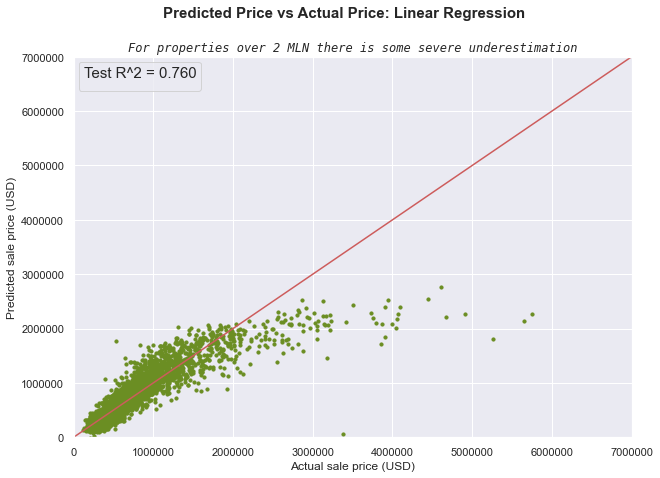

In [25]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, results.predict(X_test),s=10, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression', fontsize=15,fontweight='bold')
plt.title("For properties over 2 MLN there is some severe underestimation",style='italic',family='monospace')

plt.legend(title='Test R^2 = 0.760', title_fontsize = 15) 
plt.show()

Clearly, there is a problem. The more expensive properties are not properly priced under linear regression model, howewer for properties under 1.5 million USD the fit is great. 


### Additional feature engineering: Principal Component Analysis <br>
We perform exploratory PCA to see if the features could be combined in Principal Components which represent significant proportion of the variation.

In [26]:
#remove the constant for sm linear regression
X_test = X_test.iloc[:, 1:]
X_train = X_train.iloc[:, 1:]

First, we choose large number of principal components (15) to see what the relationship is between them and if there are any drops in variation. 

In [27]:
scaling = StandardScaler()
scaling.fit(X_train)
Scaled_data = scaling.transform(X_train)

principal = PCA(n_components = 15)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

In [28]:
principal.explained_variance_ratio_

array([0.11487014, 0.07158085, 0.05925244, 0.04174811, 0.03398587,
       0.03041969, 0.02934215, 0.02565574, 0.02413422, 0.02388951,
       0.02374303, 0.02354762, 0.02244471, 0.02207489, 0.02196353])

In [29]:
cumulative = np.cumsum(principal.explained_variance_ratio_)

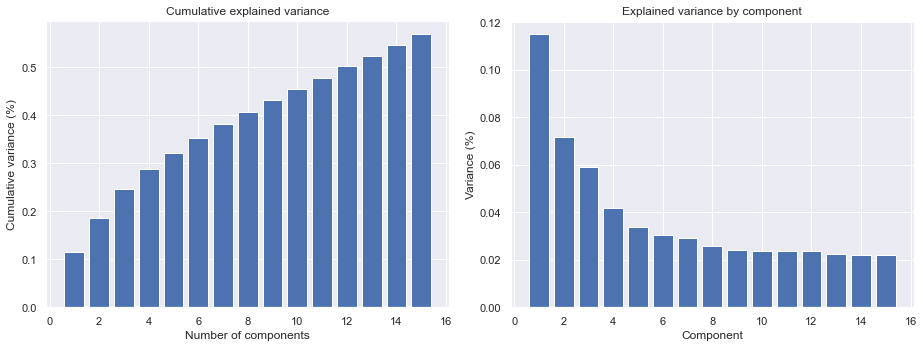

In [30]:
fig.suptitle('Principal component analysis')

plt.subplots(figsize=(13, 5))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.bar(range(1,16), cumulative )
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).bar(range(1,16), principal.explained_variance_ratio_ )
plt.title('Explained variance by component')
plt.xlabel('Component')
plt.ylabel('Variance (%)')

plt.tight_layout()

In [31]:
#Check the values of eigen vectors
principal.components_[0]

array([ 0.14761505,  0.29764038,  0.17235141,  0.19073841, -0.04975066,
        0.23210025, -0.00787547,  0.18874074,  0.25348468, -0.02658156,
        0.01120052, -0.35826098,  0.00140087,  0.25898124, -0.09405568,
        0.02197846,  0.0165514 ,  0.07986514,  0.03182096,  0.02437949,
        0.04942902,  0.03864103,  0.00408786,  0.02544373,  0.02161396,
        0.01420649, -0.0487149 , -0.03189072,  0.04513238,  0.06126279,
        0.04847141,  0.10826218,  0.08233112, -0.05499081,  0.05593629,
        0.03234349,  0.09448925,  0.02339969, -0.05360877,  0.08617049,
       -0.25947271, -0.16095567, -0.13793722, -0.02052997, -0.0094068 ,
       -0.35826098,  0.37458281, -0.09848184])

Text(0.5, 1.0, 'First two principal components')

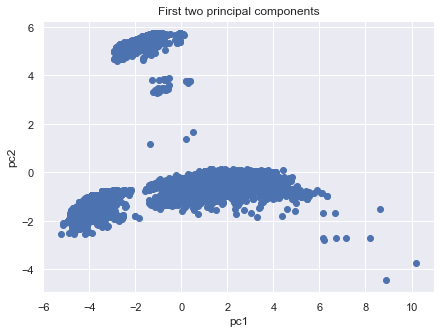

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("First two principal components")

Text(0.5, 0.92, 'First 3 principal components')

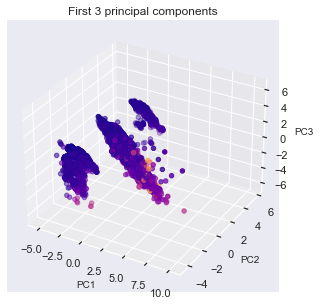

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y_train, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.title("First 3 principal components")

In [34]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.11487014 0.07158085 0.05925244 0.04174811 0.03398587 0.03041969
 0.02934215 0.02565574 0.02413422 0.02388951 0.02374303 0.02354762
 0.02244471 0.02207489 0.02196353]


Well, it looks like first 3,5 or 10 components don't explain much of the variance, certainly not around 80% level. I would not use them in this case and instead use original features. The loss in variance explained and interpretability is too high compared to the risk of overfitting. 

### Model 2. Decision tree 
Entropy model - no max_depth

In [35]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeRegressor()
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred =pd.Series(y_pred)
entr_model

DecisionTreeRegressor()

In [36]:
#tree.plot_tree(entr_model)

In [37]:
R2 = 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE : {rmse:.3f}")


Test set R2:  0.7221141577359895
RMSE : 178029.886


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


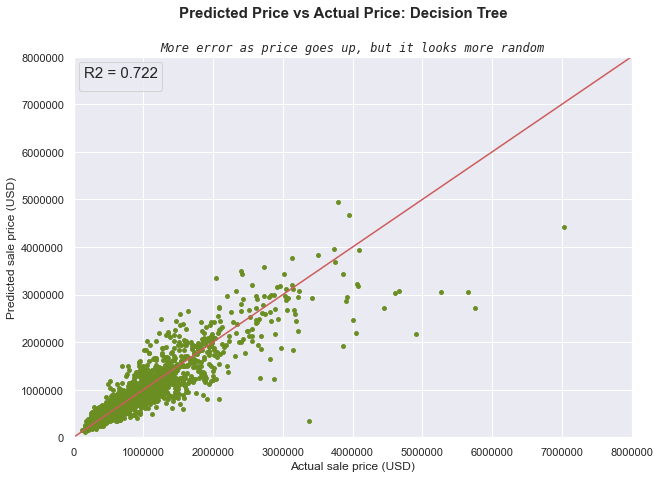

In [38]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'indianred')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, y_pred, s=15,color='olivedrab')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted Price vs Actual Price: Decision Tree', fontsize=15,fontweight='bold')
plt.title("More error as price goes up, but it looks more random",style='italic',family='monospace')


plt.legend(title='R2 = 0.722', title_fontsize = 15) 

plt.show()

R squared 0f 0.722 vs 0.760 for linear regression - not an improvement. However, it does look like the model mistreats everyone equally. 

### Model 3. Polynomial regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures  
poly = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train )

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
polynom = lin2.predict(poly.fit_transform(X_test)) 
R2 = 1 - (np.sum((y_test-polynom)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ", R2)
rmse = mean_squared_error(y_test, polynom, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

Test set R2:  0.8765629343903643
RMSE of the base model: 160854.282


Well it looks like polynomial regression did a great job, with R^2 at 0.876 versus 0.722 for Descision tree and 0.760 for linear regression. To check for overfitting, I would like to calculate R2 on train set to see the difference between test and train set. 

In [40]:
poly_train = lin2.predict(poly.fit_transform(X_train)) # predict on the test set
R2 = 1 - (np.sum((y_train-poly_train)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Train set R2:", R2)


Train set R2: 0.9151018864695167


Well R2 on train set is 0.913 and R2 on test set is 0.876, so there's some overfitting going on. Let's do predictions vs actuals plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


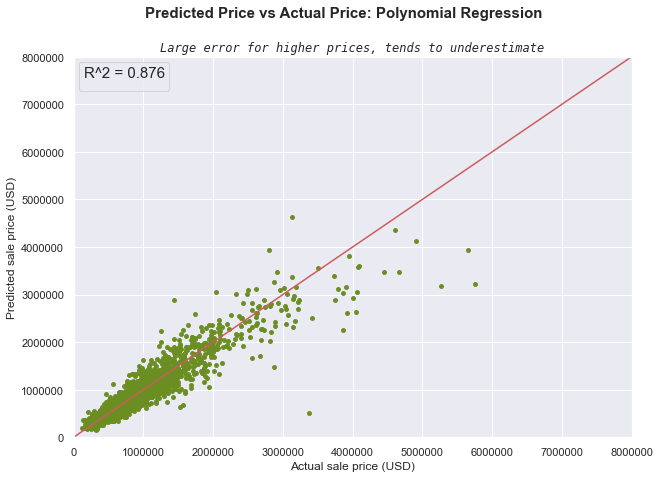

In [42]:
sns.set()
fig = plt.figure(figsize=(10, 7))

x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, polynom,s=15, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,8000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted Price vs Actual Price: Polynomial Regression', fontsize=15,fontweight='bold')
plt.title("Large error for higher prices, tends to underestimate",style='italic',family='monospace')
plt.legend(title='R^2 = 0.876', title_fontsize = 15) 
plt.show()



Well this looks much much better, however the 3 million dollars and up the relationship doesn't seem to hold up as well, but those observations are not very numerous. I would like to investigate them and see what could drive that.  

## Model 4. Multiple linear regression model with log transformed response

https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/

From page 59:

It commonly makes sense to take the logarithm of outcomes that are all-positive.

If a variable has a narrow dynamic range (that is, if the ratio between the high and low values is close to 1), then it will not make much of a difference in fit if the regression is on the logarithmic or the original scale. . . . In such a situation, it might seem to make sense to stay on the original scale for reasons of simplicity. However, the logarithmic transformation can make sense even here, because coefficients are often more easily understood on the log scale. . . . For an input with a larger amount of relative variation (for example, heights of children, or weights of animals), it would make sense to work with its logarithm immediately, both as an aid in interpretation and likely an improvement in fit too.

In [43]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)
y_test_log = transformer.transform(y_test)

In [44]:
lin2 = LinearRegression()
reg = lin2.fit(X_train, y_train_log)
log_test = reg.predict(X_test) # predict on the test set
R2 = 1 - (np.sum((y_test_log-log_test)**2)/np.sum((y_test_log-np.mean(y_test_log))**2))
print("Test set R^2: ",R2)

log_train = reg.predict(X_train) # predict on the train set
R2 = 1 - (np.sum((y_train_log-log_train)**2)/np.sum((y_train_log-np.mean(y_train_log))**2))
print("Train set R^2: ",R2)


Test set R^2:  0.8897174500254559
Train set R^2:  0.8922831317599669


In [45]:
predicted_prices =10**log_test
predicted_prices

array([1008648.0984473 ,  496431.24321486,  459305.7114596 , ...,
        362160.98813166,  713461.14617612,  289511.75600106])

In [46]:
R2 = 1 - np.sum((y_test -predicted_prices)**2)/np.sum((y_test-np.mean(y_test))**2)
print("Test set R^2: ", R2)
RMSE = mean_squared_error(y_test, predicted_prices, squared=False)
print("RMSE: ", RMSE)

Test set R^2:  0.8094125659167642
RMSE:  199874.30335067373


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


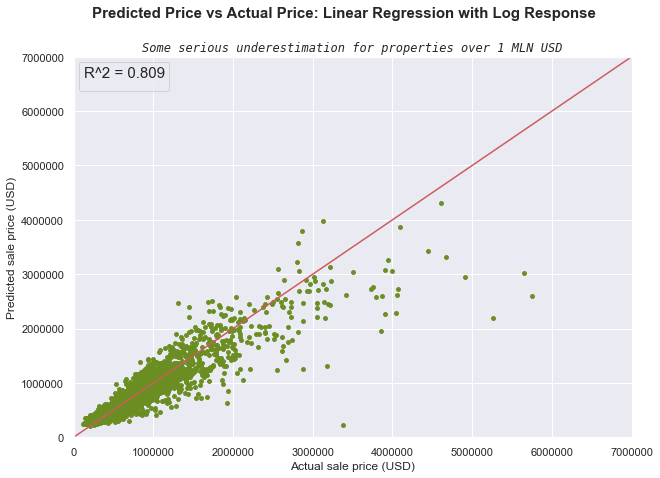

In [47]:
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, predicted_prices,s=15, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression with Log Response', fontsize=15,fontweight='bold')
plt.title("Some serious underestimation for properties over 1 MLN USD",style='italic',family='monospace')

plt.legend(title='R^2 = 0.809', title_fontsize = 15) 
plt.show()

In [48]:
#6-fold cross validation of log model
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, features, y_log, cv=kf)
print(cv_scores)
print("Mean R^2: ",np.mean(cv_scores))
print("Standard deviation R^2: ",np.std(cv_scores))
print(np.percentile(cv_scores, [2.5, 97.5]))



[0.89062495 0.89017299 0.88767644 0.89379231 0.89126408 0.89350635]
Mean R^2:  0.891172853302234
Standard deviation R^2:  0.0020752478605072307
[0.88798851 0.89375657]


### Refit the model with stats models to get the summary output

In [49]:
X_train_const = sm.add_constant(X_train)
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)

In [50]:
model = sm.OLS(y_train_log,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.892
Model:                                 OLS   Adj. R-squared:                  0.892
Method:                      Least Squares   F-statistic:                     3961.
Date:                     Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                             13:30:12   Log-Likelihood:                 24928.
No. Observations:                    20124   AIC:                        -4.977e+04
Df Residuals:                        20081   BIC:                        -4.943e+04
Df Model:                               42                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Eff Yr Built               0.0020   4.52e-05     43.444      0.000       0.002       0.002
Above Grd SF            7.572e-05   1.25e-06     60.546      0.000    7.33e-05    7.82e-05
Basemt Fin SF            3.64e-05   1.28e-06     28.477      0.000    3.39e-05    3.89e-05
Basemt Unf SF           5.198e-06   1.34e-06      3.873      0.000    2.57e-06    7.83e-06
Garage SF               4.155e-05   1.11e-06     37.386      0.000    3.94e-05    4.37e-05
Est Land SF             1.682e-06   7.79e-08     21.585      0.000    1.53e-06    1.83e-06
Unincorporated             0.0284      0.003      8.840      0.000       0.022       0.035
Quality_cat                0.0242      0.000     64.868      0.000       0.023       0.025
Garage Attached           -0.0102      0.001     -6.928      0.000      -0.013      -0.007
Design_1 Sty Townh         0.4940      0.027     17.974      0.000       0.440       0.548
Design_Bi Level            0.3733      0.018     20.209      0.000       0.337       0.409
Design_Condo               0.6660      0.040     16.654      0.000       0.588       0.744
Design_Modular             0.2338      0.032      7.422      0.000       0.172       0.296
Design_Multi Sty           0.3442      0.018     18.808      0.000       0.308       0.380
Design_Multi Sty Townh     0.4880      0.028     17.727      0.000       0.434       0.542
Design_Paired              0.3239      0.019     17.071      0.000       0.287       0.361
Design_Patio               0.3465      0.019     18.383      0.000       0.310       0.383
Design_Ranch               0.3664      0.018     20.122      0.000       0.331       0.402
Design_Split level         0.3670      0.018     20.040      0.000       0.331       0.403
Market Area_101            0.4559      0.009     49.446      0.000       0.438       0.474
Market Area_102            0.2877      0.009     30.472      0.000       0.269       0.306
Market Area_103            0.3852      0.009     41.009      0.000       0.367       0.404
Market Area_104            0.2640      0.010     26.723      0.000       0.245       0.283
Market Area_105            0.2375      0.009     25.460      0.000       0.219       0.256
Market Area_106            0.3646      0.009     39.105      0.000       0.346       0.383
Market Area_107            0.3849      0.010     40.202      0.000       0.366       0.404
Market Area_108            0.1510      0.012     12.369      0.000       0.127       0.175
Market Area_109            0.2959      0.013     23.024      0.000       0.271       0.321
Market Area_401            0.1105      0.010     11.342      0.000       0.091       0.130
Market Area_402            0.0763      0.009      8.081      0.000       0.058       0.095
Market Area_403          

In [51]:
results.params
new_coefs =10 **(results.params)
print(new_coefs)
X_test.shape
new_coefs.shape
predicted_prices= np.matmul(X_test , new_coefs)

Eff Yr Built               1.004535
Above Grd SF               1.000174
Basemt Fin SF              1.000084
Basemt Unf SF              1.000012
Garage SF                  1.000096
Est Land SF                1.000004
Unincorporated             1.067563
Quality_cat                1.057316
Garage Attached            0.976859
Design_1 Sty Townh         3.119079
Design_Bi Level            2.362054
Design_Condo               4.633960
Design_Modular             1.713199
Design_Multi Sty           2.208799
Design_Multi Sty Townh     3.076389
Design_Paired              2.107922
Design_Patio               2.220722
Design_Ranch               2.324807
Design_Split level         2.328342
Market Area_101            2.857040
Market Area_102            1.939701
Market Area_103            2.427527
Market Area_104            1.836609
Market Area_105            1.727689
Market Area_106            2.315175
Market Area_107            2.425904
Market Area_108            1.415700
Market Area_109            1

How would you interpret the linear regression coefficient of the regression model where output variable was log transformed
When the output variable in a linear regression model is log-transformed, the interpretation of the regression coefficient changes slightly. Specifically, the coefficient represents the change in the log of the dependent variable for a one-unit change in the independent variable. To interpret the coefficient in a meaningful way, you need to exponentiate it to get back to the original scale.

For example, suppose you have a linear regression model with a log-transformed dependent variable, Y, and an independent variable, X, and the coefficient for X is 0.5. In this case, we can interpret the coefficient as follows:

For a one-unit increase in X, the log of Y is expected to increase by 0.5 units (assuming all other variables are held constant). To get back to the original scale, we need to exponentiate both sides of the equation. This gives us:

exp(0.5) = 1.65

So, a one-unit increase in X is expected to result in a 1.65-fold increase in Y (assuming all other variables are held constant). Alternatively, we could say that the expected percentage change in Y for a one-unit increase in X is 65%.

It's important to note that the interpretation of the coefficient in a log-transformed model is different from the interpretation in a model where the dependent variable is not log-transformed. In the latter case, the coefficient represents the expected change in Y for a one-unit increase in X. However, in a log-transformed model, the coefficient represents the expected change in the log of Y.

All variables are significant except Design_Det 1 Sty Condo. Durbin Watson is great.  R^2 is 0.894. <br>
However, there is an interesting thing going on with the coefficient values. 
Largest coefficients are for Market Areas ranging from 1.83 to 0.4, meaning being in a certain market area increases the value by 183% or decreases by 40%. <br>
All positive, but very small increases for year built and square footage variables.<br>
Extra 1000 SF of the house yields 7.7% increase in value.<br>
Extra 1000 SF increase in finished basement yields 3.1% in value.<br>
Extra 1000SF of garage yields 3.7% of value.<br>
Unfinished basement yields only 0.31% of the price increase.<br>
And one year of the house yields 0.2%
<br>
One level increase in quality leads to 2.5% increase in price. <br>

### Model 5. XGBoost

In [53]:
import xgboost as xgb
import pandas as pd

housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

lambdas = [1, 10, 100]
gammas =[0, 10, 100]
etas =[0, 0.2, 0.5]

params = {"objective":"reg:squarederror","max_depth":4}

rmses = []
parameters =[]

for l1 in lambdas:
    for g1 in gammas:
        for e1 in etas:
            params["reg_lambda"] = l1
            params['min_split_loss'] = g1
            params['learning_rate'] = e1
            
            cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=6, num_boost_round=15, early_stopping_rounds = 10, metrics="rmse", as_pandas=True, seed=123)

            rmses.append(cv_results["test-rmse-mean"].tail(1).values[0])

            parameters.append(params)


In [54]:
print(min(rmses))

164751.60491202664


So best rmse is 164751 for model with {'objective': 'reg:squarederror',
  'max_depth': 4,
  'reg_lambda': 100,
  'min_split_loss': 100,
  'learning_rate': 0.5}. 

In [57]:
best_params={'objective': 'reg:squarederror',
  'max_depth': 4,
  'reg_lambda': 100,
  'min_split_loss': 100,
  'learning_rate': 0.5}

{}


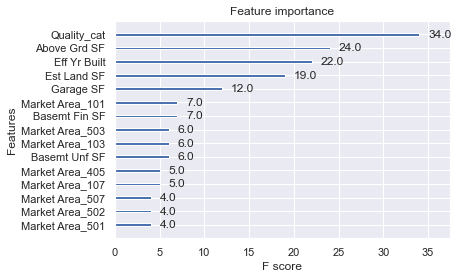

In [58]:
progress = dict()
xg_reg = xgb.train(params=best_params, dtrain=housing_dmatrix, num_boost_round=15,evals_result=progress)
print(progress)
#fig = plt.figure(figsize=(10, 30))
sns.set()
xgb.plot_importance(xg_reg,max_num_features=15)#, show_values=False, importance_type='gain'
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error

dtest_reg = xgb.DMatrix(data=X_test, label=y_test)
preds = xg_reg.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 194994.488


In [60]:
R2 =1- ((167623.580)**2)*len(y_test)/ np.sum((y_test- np.mean(y_test))**2)
print('Test XGBoost R2: ', R2)

Test XGBoost R2:  0.8659550180328633


#### Fit XGBoost final model

In [61]:
# Create the DMatrix: housing_dmatrix

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

reg_params = [0.5, 0.7, 0.9]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":6}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["eta"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results = xgb.cv(dtrain=dtrain_reg, params=params, nfold=6, num_boost_round=15, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds = 10)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of eta:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["eta", "rmse"]))

Best rmse as a function of eta:
   eta           rmse
0  0.5  152313.680885
1  0.7  156882.021388
2  0.9  162445.657192


RMSE of the base model: 157918.940


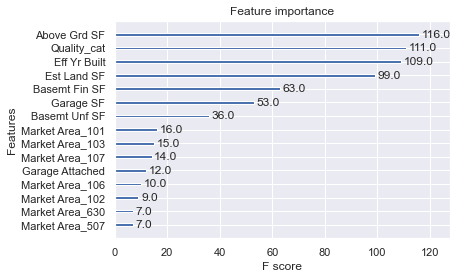

In [62]:
params = {"objective":"reg:squarederror","max_depth":6, "eta":0.5}
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=15,
)

preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(model,max_num_features=15)
plt.show()

In [63]:
R2 = 1- ((159571.016**2)*len(y_test))/ (np.sum((y_test -np.mean(y_test))**2))
print('XGBoost R2: ', R2)

XGBoost R2:  0.8785245945004174


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


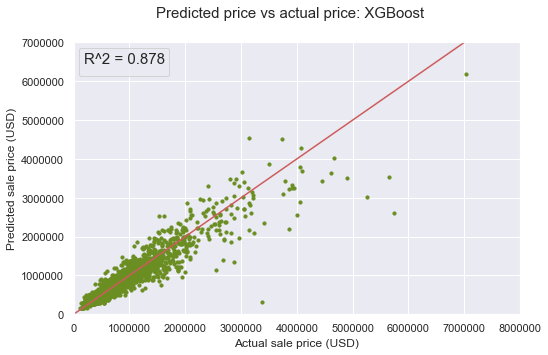

In [65]:
fig = plt.figure(figsize=(8, 5))
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted price vs actual price: XGBoost', fontsize=15)

plt.legend(title='R^2 = 0.878', title_fontsize = 15) 
plt.show()

## Random forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = number of trees in the forest <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

In [67]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

estimator = model.estimators_[5]
estimator
preds = model.predict(X_test)

R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ",R2)

Random Forest Test set R^2:  0.8936367805110946


In [68]:
train_preds = model.predict(X_train)
R2 = 1 - (np.sum((y_train-train_preds)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Random Forest Train set R^2: ",R2)

Random Forest Train set R^2:  0.9858439157083404


In [69]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = [1, 0.3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1, 0.3], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 0.3],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [71]:
rf_random.best_params_


{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 0.3,
 'max_depth': 80,
 'bootstrap': False}

In [72]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    #print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 0.55%.


So, according to our hyperparameter optimization, we can gain 0.55% in accuracy improvement. I think we could use either base model or optimized model, but the selected model is much more restrictive yet yields similar performance.  Let's use selected optimal model!

### 6-fold cross validation

In [76]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = RandomForestRegressor(n_estimators=70,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 80,
 bootstrap= False)

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print("Mean R^2: ",np.mean(cv_scores))

# Print the standard deviation
print("Standard deviation R^2: ",np.std(cv_scores))

# Print the 95% confidence interval
print(np.percentile(cv_scores, [2.5, 97.5]))

[0.90850836 0.89619433 0.91446427 0.91251231 0.86716041 0.90664429]
Mean R^2:  0.9009139933078495
Standard deviation R^2:  0.01617725322132217
[0.87078965 0.91422027]


The 95% CI for the R^2 is [0.87078965 0.91422027], and there is some variation between the folds, which tells that algorithms is still a little sensitive to splits. 

In [77]:
final_model= RandomForestRegressor(n_estimators=70,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 80,
 bootstrap= False)
# Train
final_model.fit(X_train, y_train)
# Extract single tree
estimator = final_model.estimators_[5]
estimator

preds = final_model.predict(X_test)
R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ", R2)

Random Forest Test set R^2:  0.8847456836748582


In [78]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 155431.283


With no splits, R^2 is at its highest level of 0.912. So when choosing an algorithms we'll account for that. 

In [ ]:
sns.set()

fig = plt.figure(figsize=(8, 5))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted price vs actual price: Random Forest Regression', fontsize=15)

plt.legend(title='R^2 = 0.893', title_fontsize = 15) 
plt.show()